In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import copy
import random
import warnings
import pygad
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dj38.tsp', sep=" ", skiprows=10, header=None)
df=df.drop(df.columns[[0]], axis = 1)
df.columns=list(['x','y'])
df_ = np.asarray(df)
df

,x,y
0,11003.6111,42102.5000
1,11108.6111,42373.8889
2,11133.3333,42885.8333
3,11155.8333,42712.5000
4,11183.3333,42933.3333
5,11297.5000,42853.3333
6,11310.2778,42929.4444
7,11416.6667,42983.3333
8,11423.8889,43000.2778
9,11438.3333,42057.2222


In [3]:
# calculate the distance 
def distance(route):
    distance=0
    for i in range(len(route)-1):
        p=df_[route[i+1]]-df_[route[i]]
        dis=math.hypot(p[0],p[1])
        distance=distance+dis
    p=df_[route[-1]]-df_[route[0]]
    # distance between last and fist city
    distance=distance+math.hypot(p[0],p[1])
    return distance

In [4]:
# plot the route
def plot_route(route_best):
    df_route=df.iloc[route_best]
    df_route.loc['origin'] =df_route.iloc[0]
    cities_route = np.asarray(df_route)

    plt.scatter(df_[:,0],df_[:,1])
    plt.plot(cities_route[:,0],cities_route[:,1])
    plt.show()
    print("Route: " + str(route_best) + "\n\nDistance_scaled: "+ str(distance(route_best)) )

In [5]:
def fitness_func(solution, solution_idx):
    distance=0
    for i in range(len(solution)-1):
        p=df_[solution[i+1]]-df_[solution[i]]
        dis=math.hypot(p[0],p[1])
        distance=distance+dis
    p=df_[solution[-1]]-df_[solution[0]]
    # distance between last and fist city
    distance=distance+math.hypot(p[0],p[1])
    return 1/distance

In [6]:
def on_generation(ga):   
    print("Generation", ga.generations_completed) #print No.generation  
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    solutions.append(solution)

In [7]:
time_start=datetime.datetime.now()
print("start:",time_start)

np.random.seed(2021)

seq_space=[]
for i in range(0,df.shape[0]):
    seq_space.append(i)
    
num_genes=len(seq_space)      # the number of genes / length of sequence 

num_generations=3000  # generation times
sol_per_pop=500        # poplulation per generation
num_parents_mating=10 # the number of parents selected to be solutions

gene_type=int
gene_space=seq_space


parent_selection_type="sss"
"""
    "sss"         --steady-state selection
    "rws"         --roulette wheel selection 
    "sus"         --stochastic universal selection 
    "rank"        --rank selection
    "random"      --random selection 
    "tournament"  --tournament selection
"""

crossover_type="single_point"
"""
    "single_point"  --single-point crossover
    "two_points"    --two points crossover
    "uniform"       --uniform crossover 
    "scattered"     --scattered crossover
"""

mutation_type="random"
"""
    "random"        --random mutation
    "swap"         --swap mutation
    "inversion"     --inversion mutation
    "scramble"      --scramble mutation
    "adaptive"     --adaptive mutation
"""

"""
def on_start(ga_instance):
    print("on_start()")

def on_fitness(ga_instance, population_fitness):
    print("on_fitness()")

def on_parents(ga_instance, selected_parents):
    print("on_parents()")

def on_crossover(ga_instance, offspring_crossover):
    print("on_crossover()")

def on_mutation(ga_instance, offspring_mutation):
    print("on_mutation()")

def on_stop(ga_instance, last_population_fitness):
    print("on_stop()")
                       on_start=on_start,
                       on_fitness=on_fitness,
                       on_parents=on_parents,
                       on_crossover=on_crossover,
                       on_mutation=on_mutation,
                       on_stop=on_stop
"""
  
solutions=[]

ga_instance = pygad.GA(
                       num_generations=num_generations,          # generation times
                       sol_per_pop=sol_per_pop,                # poplulation per generation
                       num_genes=num_genes,                   # the number of genes / length of sequence 
                       num_parents_mating=num_parents_mating ,# the number of parents selected to be solutions
                       fitness_func=fitness_func,             # fitness function
                       gene_type=gene_type,
                       gene_space=seq_space,
   
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
    
                       on_generation=on_generation,  
                       allow_duplicate_genes=False

                       )
ga_instance.run()

time_end=datetime.datetime.now()
print("end:",time_end)

print("duration:",time_end-time_start)

start: 2022-01-02 19:06:58.229429
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generatio

Generation 553
Generation 554
Generation 555
Generation 556
Generation 557
Generation 558
Generation 559
Generation 560
Generation 561
Generation 562
Generation 563
Generation 564
Generation 565
Generation 566
Generation 567
Generation 568
Generation 569
Generation 570
Generation 571
Generation 572
Generation 573
Generation 574
Generation 575
Generation 576
Generation 577
Generation 578
Generation 579
Generation 580
Generation 581
Generation 582
Generation 583
Generation 584
Generation 585
Generation 586
Generation 587
Generation 588
Generation 589
Generation 590
Generation 591
Generation 592
Generation 593
Generation 594
Generation 595
Generation 596
Generation 597
Generation 598
Generation 599
Generation 600
Generation 601
Generation 602
Generation 603
Generation 604
Generation 605
Generation 606
Generation 607
Generation 608
Generation 609
Generation 610
Generation 611
Generation 612
Generation 613
Generation 614
Generation 615
Generation 616
Generation 617
Generation 618
Generation

Generation 1093
Generation 1094
Generation 1095
Generation 1096
Generation 1097
Generation 1098
Generation 1099
Generation 1100
Generation 1101
Generation 1102
Generation 1103
Generation 1104
Generation 1105
Generation 1106
Generation 1107
Generation 1108
Generation 1109
Generation 1110
Generation 1111
Generation 1112
Generation 1113
Generation 1114
Generation 1115
Generation 1116
Generation 1117
Generation 1118
Generation 1119
Generation 1120
Generation 1121
Generation 1122
Generation 1123
Generation 1124
Generation 1125
Generation 1126
Generation 1127
Generation 1128
Generation 1129
Generation 1130
Generation 1131
Generation 1132
Generation 1133
Generation 1134
Generation 1135
Generation 1136
Generation 1137
Generation 1138
Generation 1139
Generation 1140
Generation 1141
Generation 1142
Generation 1143
Generation 1144
Generation 1145
Generation 1146
Generation 1147
Generation 1148
Generation 1149
Generation 1150
Generation 1151
Generation 1152
Generation 1153
Generation 1154
Generati

Generation 1605
Generation 1606
Generation 1607
Generation 1608
Generation 1609
Generation 1610
Generation 1611
Generation 1612
Generation 1613
Generation 1614
Generation 1615
Generation 1616
Generation 1617
Generation 1618
Generation 1619
Generation 1620
Generation 1621
Generation 1622
Generation 1623
Generation 1624
Generation 1625
Generation 1626
Generation 1627
Generation 1628
Generation 1629
Generation 1630
Generation 1631
Generation 1632
Generation 1633
Generation 1634
Generation 1635
Generation 1636
Generation 1637
Generation 1638
Generation 1639
Generation 1640
Generation 1641
Generation 1642
Generation 1643
Generation 1644
Generation 1645
Generation 1646
Generation 1647
Generation 1648
Generation 1649
Generation 1650
Generation 1651
Generation 1652
Generation 1653
Generation 1654
Generation 1655
Generation 1656
Generation 1657
Generation 1658
Generation 1659
Generation 1660
Generation 1661
Generation 1662
Generation 1663
Generation 1664
Generation 1665
Generation 1666
Generati

Generation 2118
Generation 2119
Generation 2120
Generation 2121
Generation 2122
Generation 2123
Generation 2124
Generation 2125
Generation 2126
Generation 2127
Generation 2128
Generation 2129
Generation 2130
Generation 2131
Generation 2132
Generation 2133
Generation 2134
Generation 2135
Generation 2136
Generation 2137
Generation 2138
Generation 2139
Generation 2140
Generation 2141
Generation 2142
Generation 2143
Generation 2144
Generation 2145
Generation 2146
Generation 2147
Generation 2148
Generation 2149
Generation 2150
Generation 2151
Generation 2152
Generation 2153
Generation 2154
Generation 2155
Generation 2156
Generation 2157
Generation 2158
Generation 2159
Generation 2160
Generation 2161
Generation 2162
Generation 2163
Generation 2164
Generation 2165
Generation 2166
Generation 2167
Generation 2168
Generation 2169
Generation 2170
Generation 2171
Generation 2172
Generation 2173
Generation 2174
Generation 2175
Generation 2176
Generation 2177
Generation 2178
Generation 2179
Generati

Generation 2631
Generation 2632
Generation 2633
Generation 2634
Generation 2635
Generation 2636
Generation 2637
Generation 2638
Generation 2639
Generation 2640
Generation 2641
Generation 2642
Generation 2643
Generation 2644
Generation 2645
Generation 2646
Generation 2647
Generation 2648
Generation 2649
Generation 2650
Generation 2651
Generation 2652
Generation 2653
Generation 2654
Generation 2655
Generation 2656
Generation 2657
Generation 2658
Generation 2659
Generation 2660
Generation 2661
Generation 2662
Generation 2663
Generation 2664
Generation 2665
Generation 2666
Generation 2667
Generation 2668
Generation 2669
Generation 2670
Generation 2671
Generation 2672
Generation 2673
Generation 2674
Generation 2675
Generation 2676
Generation 2677
Generation 2678
Generation 2679
Generation 2680
Generation 2681
Generation 2682
Generation 2683
Generation 2684
Generation 2685
Generation 2686
Generation 2687
Generation 2688
Generation 2689
Generation 2690
Generation 2691
Generation 2692
Generati

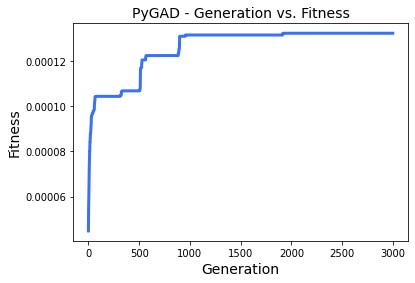

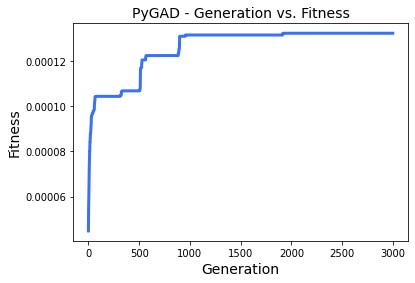

In [8]:
ga_instance.plot_fitness()

In [9]:
distance_min_distribution=[]
for i in range (len(solutions)):
    distance_min_distribution.append(distance(solutions[i]))

Text(0, 0.5, 'distance')

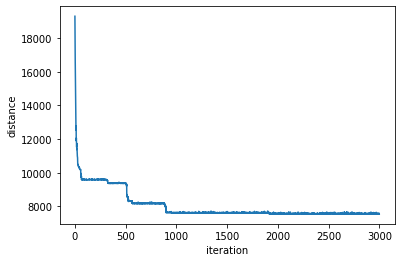

In [10]:
dis_shortest,=plt.plot(distance_min_distribution)
plt.xlabel("iteration")
plt.ylabel("distance")

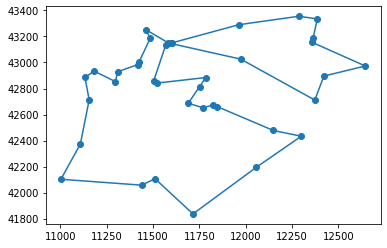

Route: [24 25 29 31 28 20 13  9  0  1  3  2  4  5  6  7  8 11 10 16 27 34 36 37
 32 33 35 30 26 18 17 15 12 14 23 21 19 22]

Distance_scaled: 7559.7515170059705


In [11]:
plot_route(solutions[-1])